In [1]:
#Importing libraries
import pandas as pd 
import numpy as np 
import matplotlib as plt
import seaborn as sns
%matplotlib inline


In [2]:
#loading both datasets
childdf =pd.read_csv('/kaggle/input/child-vs-mother-iq/child_iq.csv')
kid_iq = pd.read_csv('/kaggle/input/child-vs-mother-iq/kid_iq.csv')

In [3]:
#ignoring first unvanted columns from both datasets
childdf =childdf.iloc[:,1:]
kid_iq= kid_iq.iloc[:,1:]

In [4]:
kid_iq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   kid_score  434 non-null    int64  
 1   mom_hs     434 non-null    int64  
 2   mom_iq     434 non-null    float64
 3   mom_work   434 non-null    int64  
 4   mom_age    434 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 17.1 KB


## Lets create the prediction model 
* **Kid score** is Our target variable and all other are independent variables in Kid_iq dataset

#### Using Random Forest select important features for our prediction 

In [5]:
# Splitting Dataset 
x= kid_iq.iloc[:,1:]
y= kid_iq.iloc[:,0]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.25)

#### Trainig Random Forest Regressor model for finding Importance of features 


In [6]:
# using regressor model because our target variable is continuouse feature.
from sklearn.ensemble import RandomForestRegressor 
rfr = RandomForestRegressor()
model=rfr.fit(x_train,y_train)
pred_y = model.predict(x_test)

#### finding importance of features 

<Axes: >

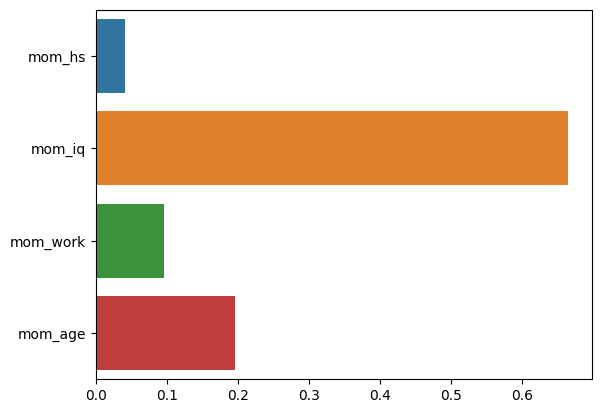

In [7]:
importance = model.feature_importances_
forest_importance = pd.Series(importance,index=x_train.columns )
sns.barplot(x=forest_importance.values , y=forest_importance.index,)

* We can see **mom_hs** is least importance for our model building so lets remove this feature and again train model withou it and then we will chell the accuracy score of both models before deleting **mom_hs** and after deleting it.

#### Training random forest regressor model after removing mom_hs

In [8]:
#create new train data without mom_hs.
x2 = kid_iq.iloc[:,2:]
#again splite the data into train and test 
x_train ,x_test , y_train,y_test = train_test_split(x2,y,random_state=42 , test_size=0.25)
#fitting model
after_model = rfr.fit(x_train,y_train)
#predicting x_test 
pred_y2 = after_model.predict(x_test)

#### Lets check the performence metrics of both model 

In [9]:
from sklearn.metrics import mean_absolute_error ,r2_score ,mean_absolute_percentage_error

# mean squared error and r2 score of before deleting mom_hs feature
print("before removing least important feature \n")
print("mean_absolute_error :%1.4f "%mean_absolute_error(y_test,pred_y))
print("mean_absolute_percentage_error :%1.4f "%mean_absolute_percentage_error(y_test,pred_y))
print("R2 score :%1.4f "%r2_score(y_test,pred_y))


# mean squared error and r2 score of after deleting mom_hs feature 
print("\n after removing least important feature \n")
print("mean_absolute_error :%1.4f "%mean_absolute_error(y_test,pred_y2))
print("mean_absolute_percentage_error :%1.4f "%mean_absolute_percentage_error(y_test,pred_y2))
print("R2 score :%1.4f "%r2_score(y_test,pred_y2))



before removing least important feature 

mean_absolute_error :16.5448 
mean_absolute_percentage_error :0.2149 
R2 score :0.0536 

 after removing least important feature 

mean_absolute_error :16.7948 
mean_absolute_percentage_error :0.2179 
R2 score :0.0605 


* we can clearly see that MAE befor and after it differs around **0.50** points this is the magic of removing important features 

### Conclusion :
* we can see mean absolute error between actual and predicting values is **16.49** it means kids IQ can be **+16.49 or -16.49** from actual IQ. 
* mean if our model predict Kid IQ bwtween 60-100 so in thise case the actual IQ can be between **-16.46 + 60 to +16.49 + 100** .

# Thank you
* please upvote and give Your feedback, Happy learning. <br>
Yours ~~Sopan Kshirsagar~~
